In [68]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [69]:
import pandas as pd
import numpy as np
from utilities import *
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, OrdinalEncoder

In [70]:
X_train, y_train, X_test, y_test = load_data()
X_train['Target'] = y_train

### Test percentage of nulls in each column

In [71]:
num_of_nulls = X_train.isna().sum()
percentage_of_nulls = num_of_nulls/X_train.shape[0]
percentage_of_nulls.sort_values(ascending=False, inplace=True)
percentage_of_nulls.apply(lambda x: f"{x*100:.3f}%").head(10)

PoolQC         99.521%
MiscFeature    96.301%
Alley          93.767%
Fence          80.753%
MasVnrType     59.726%
FireplaceQu    47.260%
LotFrontage    17.740%
GarageYrBlt     5.548%
GarageCond      5.548%
GarageType      5.548%
dtype: object

# Conslusion -> remove columns with nulls percentage higher than 90%

### Correletanions

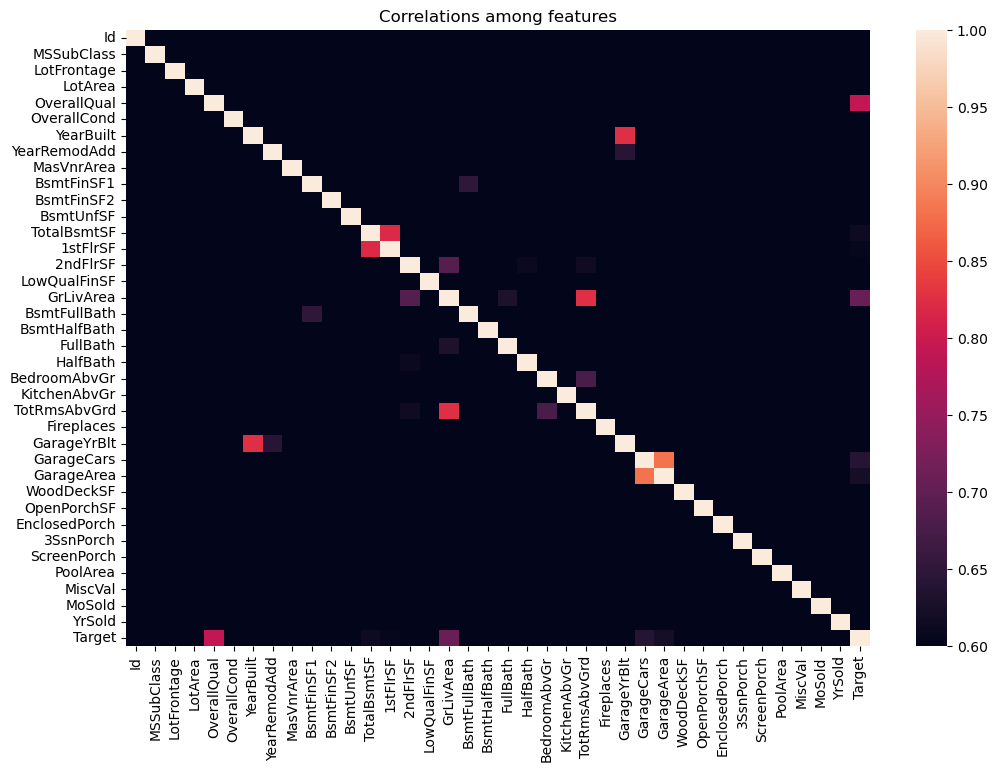

In [72]:
plt.subplots(figsize=(12,8))
sns.heatmap(data=X_train.corr(numeric_only=True), vmin=0.6)
plt.title("Correlations among features")
plt.show()

### High correlation beetwen YearBuilt/GarageYrBlt, GrlivArea/TotRmsAbvGrd, 1stFlrSF/TotalBsmtSF, GarageArea/GarageCars

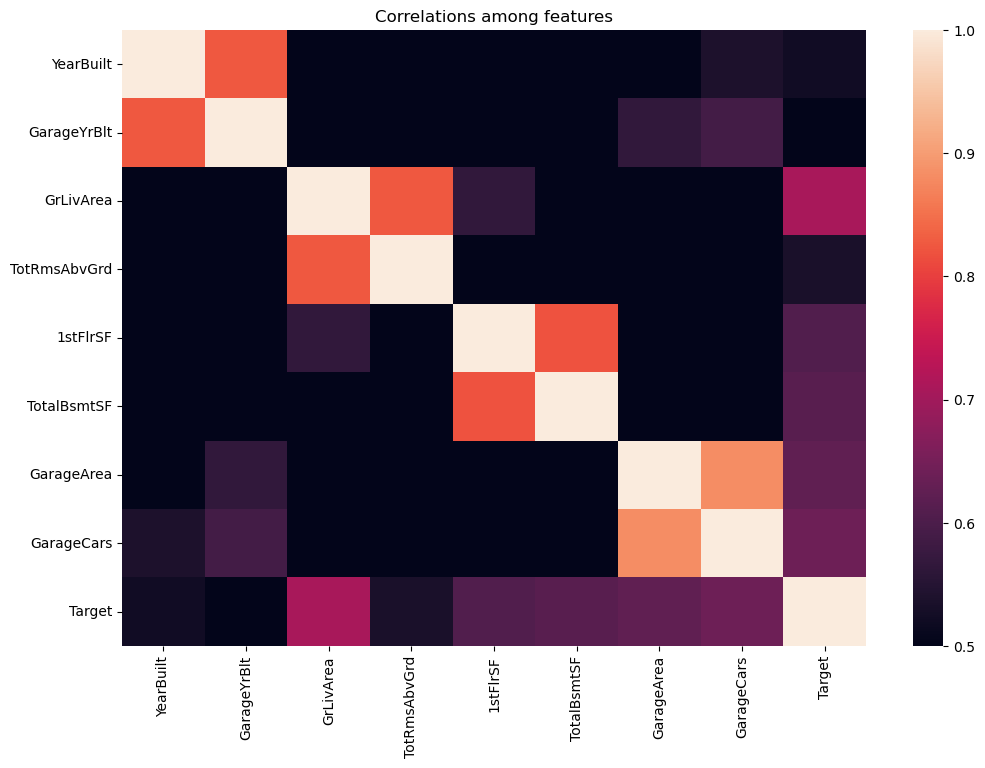

In [73]:
correlatedColumns = ['YearBuilt', 'GarageYrBlt', 'GrLivArea', 'TotRmsAbvGrd', '1stFlrSF', 'TotalBsmtSF', 'GarageArea', 'GarageCars', 'Target']
plt.subplots(figsize=(12,8))
sns.heatmap(data=X_train[correlatedColumns].corr(numeric_only=True), vmin=0.5)
plt.title("Correlations among features")
plt.show()

# Conslusion -> remove columns: ["GarageYrBlt", 'TotRmsAbvGrd', "1stFlrSF",'GarageArea']

### Numeric data distributions

In [87]:
from scipy.stats import skew

skewed_feats = X_train.select_dtypes(exclude='object').apply(lambda x: skew(x.dropna())) #compute skewness
skewed_feats = skewed_feats[skewed_feats > 0.75]
skewed_feats = skewed_feats.index

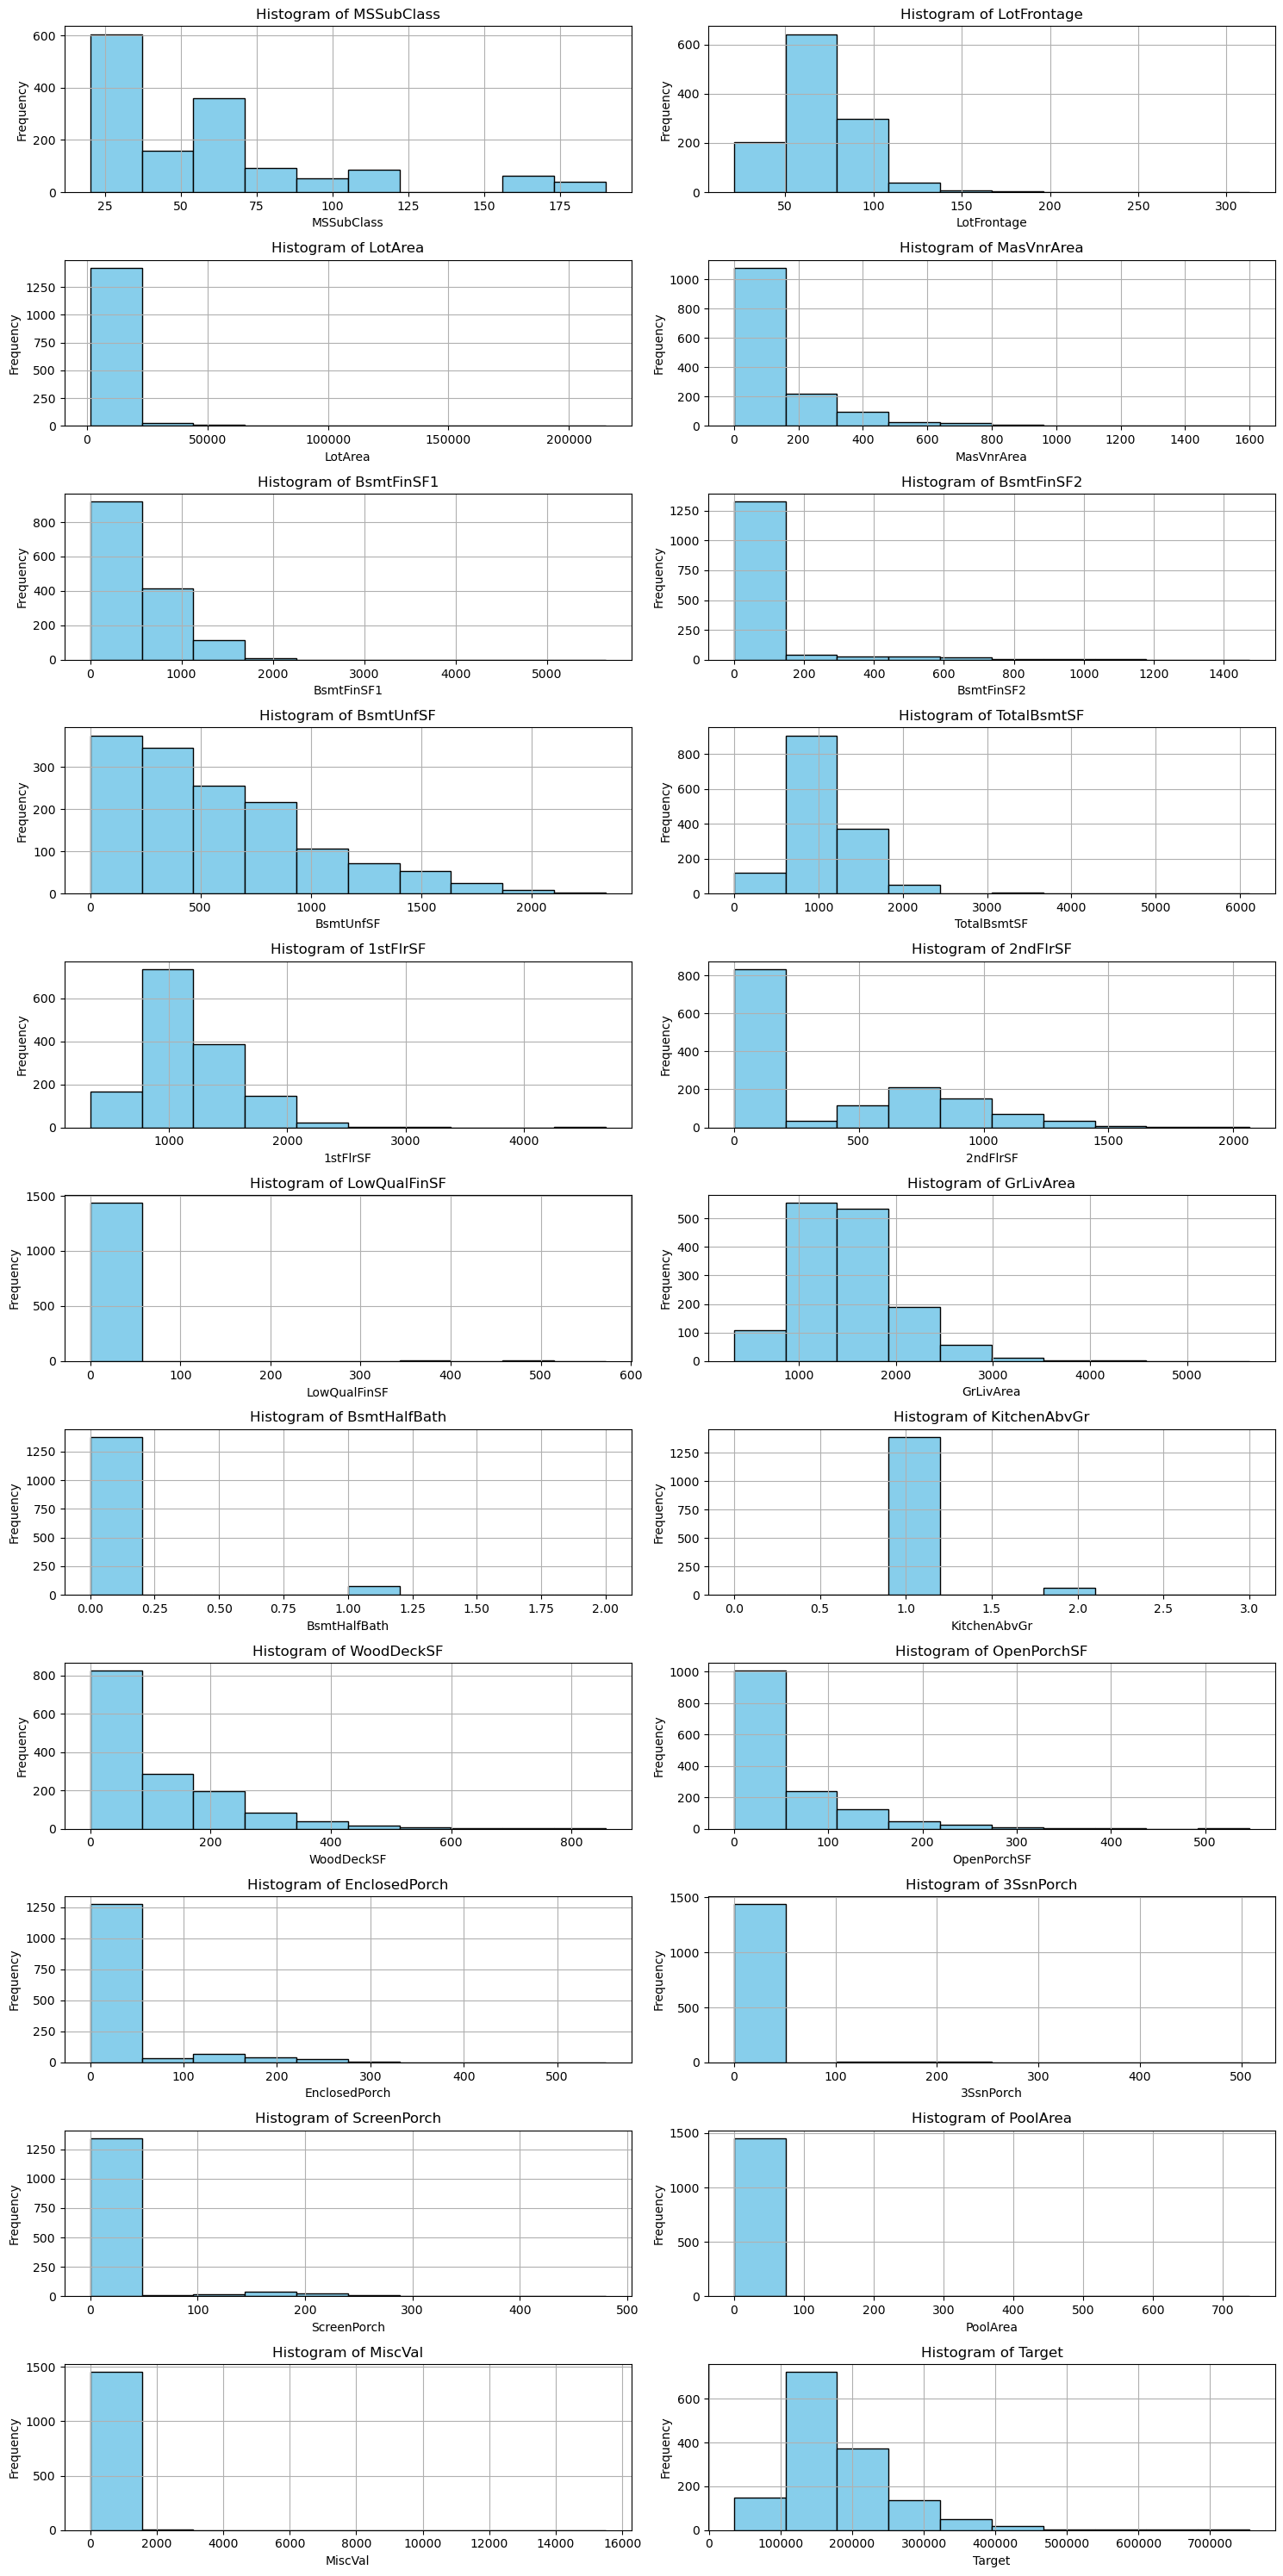

In [95]:
X = X_train[skewed_feats]
num_cols = 2
num_rows = int(np.ceil(len(X.columns) / 2))
fig, axs = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 30))

for i, column in enumerate(X):
    row = i // 2
    col = i % 2
    axs[row, col].hist(X[column], bins=10, color='skyblue', edgecolor='black')
    axs[row, col].set_title(f'Histogram of {column}')
    axs[row, col].set_xlabel(column)
    axs[row, col].set_ylabel('Frequency')
    axs[row, col].grid(True)

plt.tight_layout()
plt.show()